In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("../data/the_grammy_awards.csv")

In [4]:

df.head()


df.info()


df.describe()


df.isna().sum()


df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4810 non-null   int64 
 1   title         4810 non-null   object
 2   published_at  4810 non-null   object
 3   updated_at    4810 non-null   object
 4   category      4810 non-null   object
 5   nominee       4804 non-null   object
 6   artist        2970 non-null   object
 7   workers       2620 non-null   object
 8   img           3443 non-null   object
 9   winner        4810 non-null   bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 343.0+ KB


year              62
title             62
published_at       4
updated_at        10
category         638
nominee         4131
artist          1658
workers         2366
img             1463
winner             1
dtype: int64

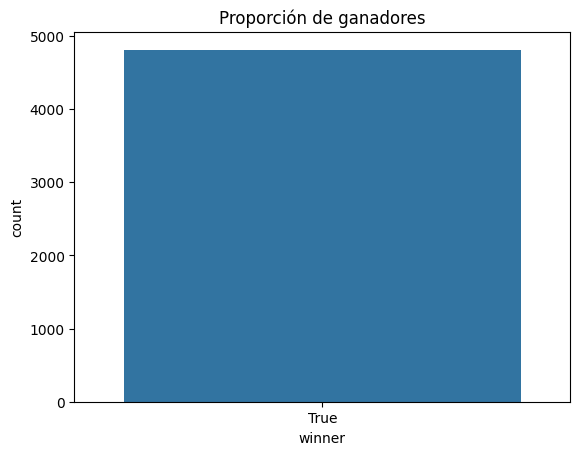

In [ ]:
sns.countplot(data=df, x="winner")
plt.title("Proporción de ganadores")
plt.show()

In [9]:
df["published_at"] = pd.to_datetime(df["published_at"], errors="coerce", infer_datetime_format=True)
df["updated_at"]   = pd.to_datetime(df["updated_at"], errors="coerce", infer_datetime_format=True)


C:\Users\ruizt\AppData\Local\Temp\ipykernel_9608\3235695612.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["published_at"] = pd.to_datetime(df["published_at"], errors="coerce", infer_datetime_format=True)
C:\Users\ruizt\AppData\Local\Temp\ipykernel_9608\3235695612.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["updated_at"]   = pd.to_datetime(df["updated_at"], errors="coerce", infer_datetime_format=True)


In [10]:
mask = df["published_at"].notna() & df["updated_at"].notna()
df.loc[mask, "days_between"] = (df.loc[mask, "updated_at"] - df.loc[mask, "published_at"]).dt.days


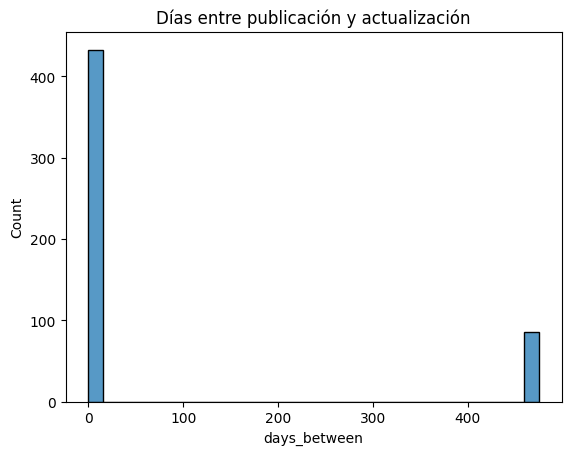

In [11]:
sns.histplot(df["days_between"].dropna(), bins=30)
plt.title("Días entre publicación y actualización")
plt.show()


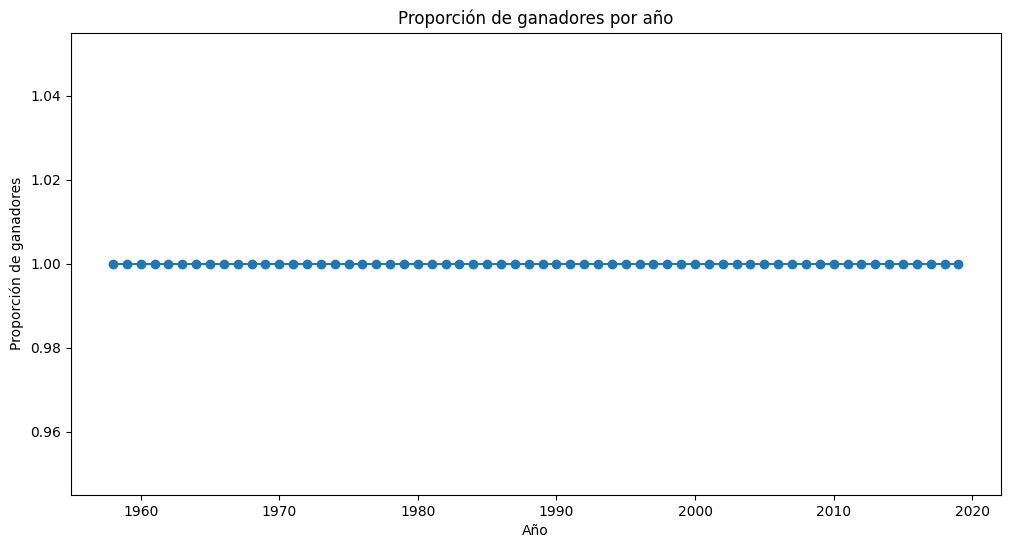

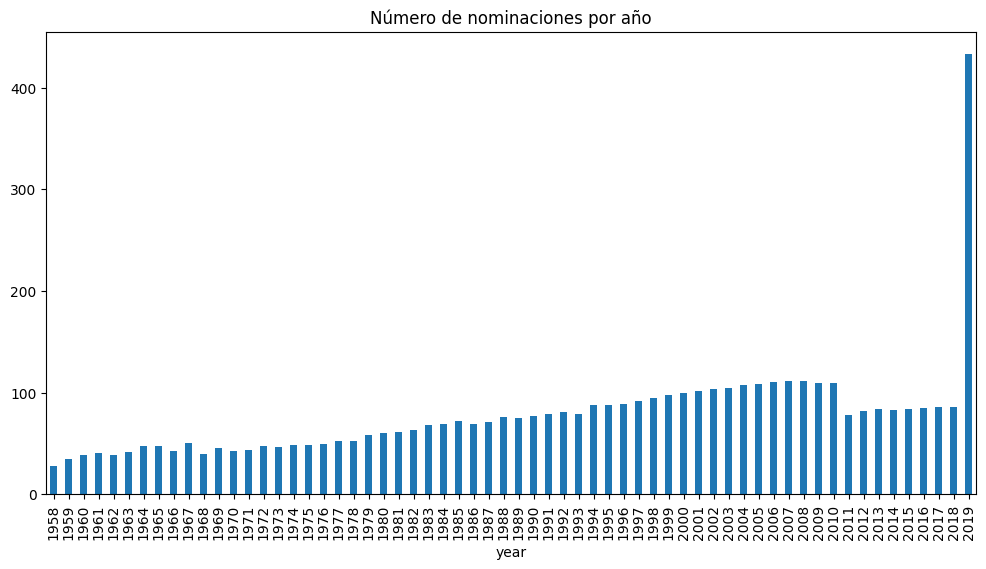

In [ ]:
plt.figure(figsize=(12,6))
df.groupby("year")["winner"].mean().plot(marker="o")
plt.title("Proporción de ganadores por año")
plt.ylabel("Proporción de ganadores")
plt.xlabel("Año")
plt.show()
plt.figure(figsize=(12,6))
df["year"].value_counts().sort_index().plot(kind="bar")
plt.title("Número de nominaciones por año")
plt.show()

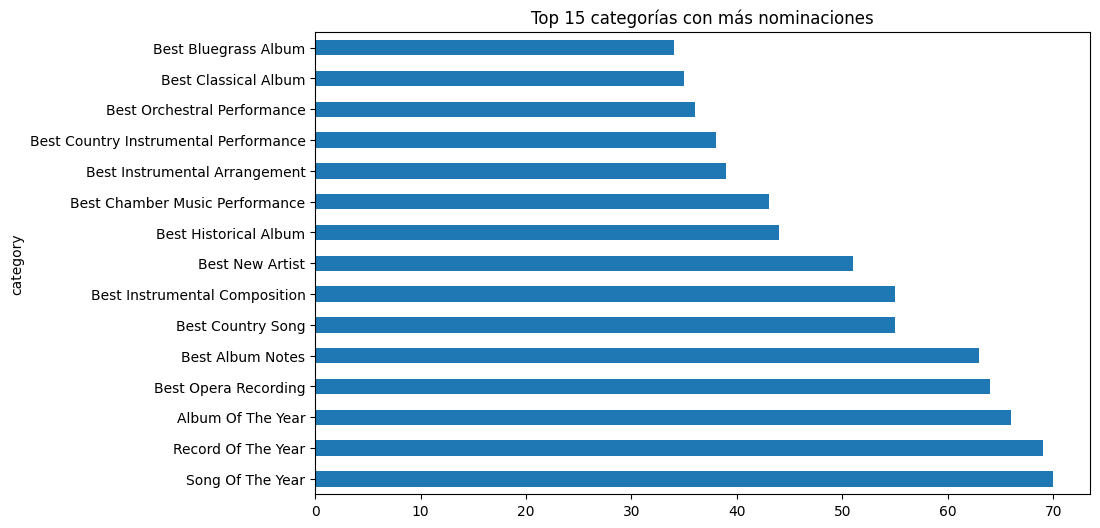

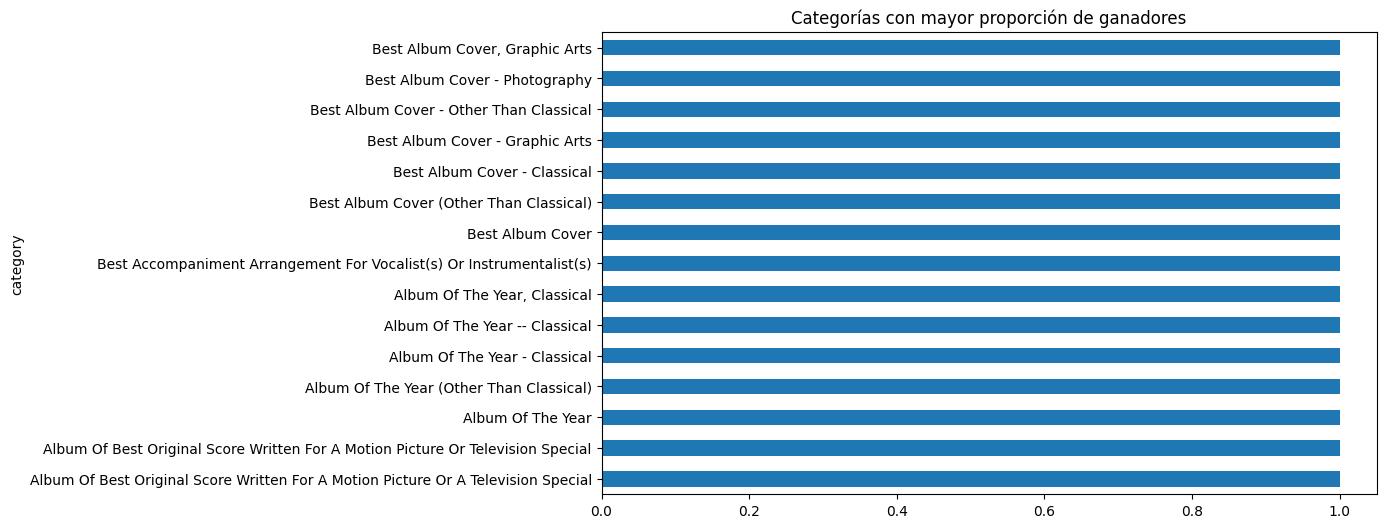

In [ ]:
plt.figure(figsize=(10,6))
df["category"].value_counts().head(15).plot(kind="barh")
plt.title("Top 15 categorías con más nominaciones")
plt.show()
cat_win = df.groupby("category")["winner"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
cat_win.head(15).plot(kind="barh")
plt.title("Categorías con mayor proporción de ganadores")
plt.show()


In [4]:
df.shape
print(df.columns)

Index(['year', 'title', 'published_at', 'updated_at', 'category', 'nominee',
       'artist', 'workers', 'img', 'winner'],
      dtype='object')


In [15]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
primer_año = df['year'].min()
ultimo_año = df['year'].max()

print("Primer año:", primer_año)
print("Último año:", ultimo_año)

Primer año: 1958
Último año: 2019


In [ ]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
ultimo_año = df['year'].max()
ganador_ultimo_año = df[(df['year'] == ultimo_año) & (df['winner'] == True)]

print("Último año:", ultimo_año)
print("Título(s) ganador(es):")
print(ganador_ultimo_año['title'].tolist())

Último año: 2019
Título(s) ganador(es):
['62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)', '62nd Annual GRAMMY Awards  (2019)

In [ ]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
ultimo_año = df['year'].max()
ganadores_ultimo_año = df[(df['year'] == ultimo_año) & (df['winner'] == True)]

print(f"🏆 Ganadores del año {ultimo_año}:\n")
for _, fila in ganadores_ultimo_año.iterrows():
    print(f"- Categoría: {fila['category']}")
    print(f"  Título: {fila['title']}")
    print(f"  Artista: {fila['artist']}")
    print(f"  Nominado: {fila['nominee']}")
    print()

🏆 Ganadores del año 2019:

- Categoría: Record Of The Year
  Título: 62nd Annual GRAMMY Awards  (2019)
  Artista: Billie Eilish
  Nominado: Bad Guy

- Categoría: Record Of The Year
  Título: 62nd Annual GRAMMY Awards  (2019)
  Artista: Bon Iver
  Nominado: Hey, Ma

- Categoría: Record Of The Year
  Título: 62nd Annual GRAMMY Awards  (2019)
  Artista: Ariana Grande
  Nominado: 7 rings

- Categoría: Record Of The Year
  Título: 62nd Annual GRAMMY Awards  (2019)
  Artista: H.E.R.
  Nominado: Hard Place

- Categoría: Record Of The Year
  Título: 62nd Annual GRAMMY Awards  (2019)
  Artista: Khalid
  Nominado: Talk

- Categoría: Record Of The Year
  Título: 62nd Annual GRAMMY Awards  (2019)
  Artista: Lil Nas X Featuring Billy Ray Cyrus
  Nominado: Old Town Road

- Categoría: Record Of The Year
  Título: 62nd Annual GRAMMY Awards  (2019)
  Artista: Lizzo
  Nominado: Truth Hurts

- Categoría: Record Of The Year
  Título: 62nd Annual GRAMMY Awards  (2019)
  Artista: Post Malone & Swae Lee
  No